## 순환신경망 RNN - 7장 순환신경망 ; 4 임베딩 layers



In [6]:
## 환경 로드

import tensorflow as tf
import numpy as np

### 다양한 자연언어의 정보화  

- **정수 인덱스(index)를 저장하는 방법**

  - "This is a big cat"이라는 문장에 대해 정수 인덱스를 저장하면 처음 나오는 단어부터 인덱스를 저장  

  - "This is big"

    - [0, 1, 3] 으로 표현
    - [0, 1, 3] 을 다시 원 핫 인코딩으로 표현하는 방법  

- **임베딩 레이어**

  - 자연어를 수치화된 정보로 바꾸기 위한 레이어

    - 자연어는 시간의 흐름에 따라 정보가 연속적으로 이어지는 시퀀스 데이터  
    - 영어는 문자(character), 한글은 문자를 넘어 자소 단위로도 쪼갤 수 있음  

- **n-gram 기법**

  - 몇 개의 문자를 묶어서 파악하는 방법

### 워드 임베딩  

- **Word를 R차원의 Vector로 매핑시켜주는 것**  

  - 값, 텍스트 내의 단어들을 밀집 벡터(dense vector)로 만드는 것  
  - 단어를 의미론적 기하 공간에 매칭 시킬 수 있도록 수치 및 벡터화 시키는 것  
  - 밀집 벡터는 대부분의 값이 실수이고, 저차원적인 벡터를 의미  
  - W는 Learning을 통해 학습  

- **2차원 임베딩을 하는 경우 다음과 같은 숫자 벡터**  

  - 4차원의 임베딩

- **특징**

  - 한정된 길이의 벡터로 자연어를 표현  
  - 원-핫 벡터와 같은 희소 벡터(0 또는 1로 이루어진 벡터)와 달리 훈련 데이터로부터 학습을 하는 벡터  

  

### 워드 임베딩 과정  

[그림 참고 p.5 pdf 바로가기](https://github.com/lee7py/Tensorflow-DNN/blob/master/%5B08-1%20%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%20%EA%B8%B0%EB%B0%98%20%EB%94%A5%EB%9F%AC%EB%8B%9D%5D%20(0814%EA%B8%88%201~2%EA%B5%90%EC%8B%9C%20p30)%20%EC%88%9C%ED%99%98%EC%8B%A0%EA%B2%BD%EB%A7%9D%20%EC%9E%84%EB%B2%A0%EB%94%A9%20%EB%A0%88%EC%9D%B4%EC%96%B4.pdf)

### One hot encodings

- **단어의 인덱스에 해당하는 원소만 1이고 나머지는 0인 배열**

  - 약점

    - 사용하는 메모리의 양에 비해 너무 적은 정보량을 표현  
    - 저장된 단어의 수가 많아질수록 원-핫 인코딩 배열의 두 번째 차원의 크기도 그에 비례해서 늘어나기 때문에 이 데이터가 차지하는 메모리의 양이 더욱 늘어남  

[그림 참고 p.6 pdf 바로가기](https://github.com/lee7py/Tensorflow-DNN/blob/master/%5B08-1%20%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%20%EA%B8%B0%EB%B0%98%20%EB%94%A5%EB%9F%AC%EB%8B%9D%5D%20(0814%EA%B8%88%201~2%EA%B5%90%EC%8B%9C%20p30)%20%EC%88%9C%ED%99%98%EC%8B%A0%EA%B2%BD%EB%A7%9D%20%EC%9E%84%EB%B2%A0%EB%94%A9%20%EB%A0%88%EC%9D%B4%EC%96%B4.pdf)

### 감성 분석 (Sentiment analysis)

- **입력된 자연어 안의 주관적 의견, 감정 등을 찾아내는 문제**  

  - 문장의 긍정/부정이나 긍정/중립/부정을 분류  
  - 영화 리뷰나 음식점 리뷰

    - 데이터의 양이 많고 별점을 함께 달기 때문에  

      - 긍정/중립/부정 라벨링이 쉬워서 극성(polarity) 감성 분석에 쉽게 적용이 가능  

      

### 긍정 부정 감성 분석  

- **Naver Sentiment Movie Corpus v1.0**

  - 네이버의 박은정 박사  
  - 2015년에 발표한 "Naver Sentiment Movie Corpus v1.0"을 이용  
    - 긍정/부정 감성 분석  

- **20만개 영화 리뷰**

  - 훈련 데이터 15만개, 테스트 데이터 5만 개  
  - 부정적인 리뷰 10만개
    - 10만 개 별점 1 ~ 4
  - 긍정적인 리뷰 10만개
    - 10만 개, 9 ~ 10  
  - 다음은 데이터에서 제외
    - 중립적 리뷰
      - 데이터 세트에서는 제외, 별점 5~8에 해당하는 리뷰

In [3]:
# Naver Sentiment Movie Corpus v1.0 다운로드
path_to_train_file = tf.keras.utils.get_file('train_txt', 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt')
path_to_test_file = tf.keras.utils.get_file('test_txt', 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt')

4898816/4893335 [==============================] - 0s 0us/step


### 데이터 로드

- **하나의 리뷰는 행으로 구분**

  - 한 행은 2 개의 탭(\t)으로 id, 리뷰 내용, 레이블 3개로 구분  
  - Label ; 0: 부정, 1:긍정  


```py
# 데이터 로드 및 확인
# 데이터를 메모리에 불러옵니다. encoding 형식으로 utf-8 을 지정해야 합니다.  
train_text = open(path_to_train_file, 'rb').read().decode(encoding='utf-8')
test_text = open(path_to_test_file, 'rb').read().decode(encoding='utf-8')  

# 텍스트가 총 몇 자인지 확인합니다.
print('length of text: {} characters'.format(len(train_text)))
print('length of text: {} characters'.format(len(test_text)))


# 처음 300 자를 확인해보자.
print(train_text[:300])
```

In [4]:
### 데이터 로드

# 데이터 로드 및 확인
# 데이터를 메모리에 불러옵니다. encoding 형식으로 utf-8 을 지정해야 합니다.  
train_text = open(path_to_train_file, 'rb').read().decode(encoding='utf-8')
test_text = open(path_to_test_file, 'rb').read().decode(encoding='utf-8')  

# 텍스트가 총 몇 자인지 확인합니다.
print('length of text: {} characters'.format(len(train_text)))
print('length of text: {} characters'.format(len(test_text)))


# 처음 300 자를 확인해보자.
print(train_text[:300])

length of text: 6937271 characters
length of text: 2318260 characters
id	document	label
9976970	아 더빙.. 진짜 짜증나네요 목소리	0
3819312	흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나	1
10265843	너무재밓었다그래서보는것을추천한다	0
9045019	교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정	0
6483659	사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다	1
5403919	막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.	0
7797314	원작의


### 데이터 (학습 및 테스트) 정답 추출  

- **train_Y, test_Y를 구하는 방법**

  - 하나하나의 리뷰 관리

    - 먼저 각 텍스트를 개행 문자(\n)로 분리한 다음  
  
  - 헤더에 해당하는 부분(id document label)을 제외한  
  
    - 나머지([1:])에 대해 각 행을 처리

      - for row in train_text.split('\n')[1:]

  - 각 행은 탭 문자(\t)로 나눠진 후에  

    - 정답인 3번 째 원소 (원래는 정수 형태의 문자열)를 정수(integer)로 변환해서 저장  

      - [int(row.split('\t')[2])]

  - np.array로 결과 리스트를 감싸서 네트워크에 입력하기 쉽게 생성  

```py
train_Y = np.array([[int(row.split('\t')[2])] for row in train_text.split('\n')[1:] if row.count('\t') > 0])
test_Y = np.array([[int(row.split('\t')[2])] for row in test_text.split('\n')[1:] if row.count('\t') > 0])

print(train_Y.shape, test_Y.shape)
print(train_Y[:5])
```

In [7]:
### 데이터 (학습 및 테스트) 정답 추출  

train_Y = np.array([[int(row.split('\t')[2])] for row in train_text.split('\n')[1:] if row.count('\t') > 0])
test_Y = np.array([[int(row.split('\t')[2])] for row in test_text.split('\n')[1:] if row.count('\t') > 0])

print(train_Y.shape, test_Y.shape)
print(train_Y[:5])

(150000, 1) (50000, 1)
[[0]
 [1]
 [0]
 [0]
 [1]]


### 토큰화(Tokenization)와 정제(Cleansing)

- **토큰화**

  - 자연어를 처리 가능한 작은 단위로 나누는 것

    - 띄어쓰기 단위로 나누기

- **정제**

  - 원하지 않는 입력이나 불필요한 기호 등을 제거하는 것  
  - 정제를 위한 함수

    - 김윤 박사의 CNN_sentence 깃허브 저장소의 코드를 사용

      - https://github.com/yoonkim/CNN_sentence/blob/master/process_data.py
    
      - 함수 clean_str(string)

        - 먼저 제거할 문자는 모두 공백으로 대체하고
        - 나눌 단어는 중간에 공백을 삽입하여  
        - 공백으로 단어를 나눌 전 처리 과정을 진행하는 함수

### clean_str(string) 함수

- **re.sub(r"[^가-힣A-Za-z0-9(),!?\'\`]"," ", string)**

  - 대괄호([])로 묶은 부분의 처음에^  

    - 그에 포함되지 않는 나머지 모두를 선택

  - 한글, 영문, 숫자, 괄호, 쉼표, 느낌표, 물음표, 작은따옴표, 역따옴표를 제외한 나머지는 모두 찾아서 공백(" ")으로 대체

    - 마침표. 도 공백으로 바뀌어 최종적으로 사라짐

- **대부분은 다음과 같이 단어에 붙어있는 불필요한 부분에 공백을 추가** 

  - string = re.sub(r"\'s", "\'s", string)

    - 세 번째 인수인 string 에서 첫 번째 인수에 해당하는 내용을 찾아서 두 번째 인수로 단순히 교체  

      - 's를 앞에 공백을 붙히기

```py
# train 데이터의 입력 (X)에 대한 정제(Cleaning)

import re

# from https://github.com/yoonkim/CNN_sentence/blob/master/process_data.py
def clean_str(string):
  string = re.sub(r"[^가-힣A-Za-z0-9(),!?\'\`]"," ", string)
  string = re.sub(r"\'s", "\'s", string)
  string = re.sub(r"\'ve", " \'ve", string)

  ...

  return string.lower()
```

### 리뷰 내용 정제

- **train_text_X: 리뷰 내용 정제해 저장**

  ```py
  # train 데이터의 입력 (X)에 대한 정제(Cleaning)

  import re

  # from https://github.com/yoonkim/CNN_sentence/blob/master/process_data.py
  def clean_str(string):
    string = re.sub(r"[^가-힣A-Za-z0-9(),!?\'\`]"," ", string)
    string = re.sub(r"\'s", "\'s", string)
    string = re.sub(r"\'ve", " \'ve", string)

    ...

    return string.lower()
  ```

  - 각 행에서 탭으로 분리한 것 중 첨자 1번이 리뷰 내용

    ```py
    train_text_X = [row.split('\t')[1] for row in train_text.split('\n')[1:] if row.count('\t') > 0]
    ```

  - 각각의 리뷰가 저장된 sentence를 정제하기 위해 함수 호출

    ```py
    train_text_X = [clean_str(sentence) for sentence in train_text_X]
    ```

- **첫 5개 리뷰의 단어 추출**  

```py
# 문장을 띄어쓰기 단위로 단어 분리
sentences = [sentence.split(' ') for sentence in train_text_X]

for i in range(5):
  print(sentences[i])
```

### 리뷰를 단어로만 구분하여 생성

- **정규 표현식(re:regular expression) 불러오기**

```py
import re

def clean_str(string):
  string = re.sub(r"[^가-힣A-Za-z0-9(),!?\'\`]"," ", string)
  string = re.sub(r"\'s", " \'s", string)
  string = re.sub(r"\'ve", " \'ve", string)
  string = re.sub(r"n\'t", " n\'t", string)
  string = re.sub(r"\'re", " \'re", string)
  string = re.sub(r"\'d", " \'d", string)
  string = re.sub(r"\'ll", " \'ll", string)
  string = re.sub(r",", " , ", string)
  string = re.sub(r"!", " ! ", string)
  string = re.sub(r"\(", " \( ", string)
  string = re.sub(r"\)", " \) ", string)
  string = re.sub(r"\?", " \? ", string)
  string = re.sub(r"\s{2,}", " ", string)
  string = re.sub(r"\'{2,}", "\'", string)
  string = re.sub(r"\'", "", string)

  return string.lower()


train_text_X = [row.split('\t')[1] for row in train_text.split('\n')[1:] if row.count('\t') > 0]
train_text_X = [clean_str(sentence) for sentence in train_text_X]

# 문장을 띄어쓰기 단위로 단어 분리
sentences = [sentence.split(' ') for sentence in train_text_X]
for i in range(5):
  print(sentences[i])
```




In [9]:
### 리뷰를 단어로만 구분하여 생성

import re

def clean_str(string):
  string = re.sub(r"[^가-힣A-Za-z0-9(),!?\'\`]"," ", string)
  string = re.sub(r"\'s", " \'s", string)
  string = re.sub(r"\'ve", " \'ve", string)
  string = re.sub(r"n\'t", " n\'t", string)
  string = re.sub(r"\'re", " \'re", string)
  string = re.sub(r"\'d", " \'d", string)
  string = re.sub(r"\'ll", " \'ll", string)
  string = re.sub(r",", " , ", string)
  string = re.sub(r"!", " ! ", string)
  string = re.sub(r"\(", " \( ", string)
  string = re.sub(r"\)", " \) ", string)
  string = re.sub(r"\?", " \? ", string)
  string = re.sub(r"\s{2,}", " ", string)
  string = re.sub(r"\'{2,}", "\'", string)
  string = re.sub(r"\'", "", string)

  return string.lower()


train_text_X = [row.split('\t')[1] for row in train_text.split('\n')[1:] if row.count('\t') > 0]
train_text_X = [clean_str(sentence) for sentence in train_text_X]

# 문장을 띄어쓰기 단위로 단어 분리
sentences = [sentence.split(' ') for sentence in train_text_X]
for i in range(5):
  print(sentences[i])

['아', '더빙', '진짜', '짜증나네요', '목소리']
['흠', '포스터보고', '초딩영화줄', '오버연기조차', '가볍지', '않구나']
['너무재밓었다그래서보는것을추천한다']
['교도소', '이야기구먼', '솔직히', '재미는', '없다', '평점', '조정']
['사이몬페그의', '익살스런', '연기가', '돋보였던', '영화', '!', '스파이더맨에서', '늙어보이기만', '했던', '커스틴', '던스트가', '너무나도', '이뻐보였다']


### 문장 길이 확인

- **네트워크에 입력하려면 데이터의 크기(문장의 단어 수)는 동일**

  - 긴 문장은 줄이고, 짧은 문장에는 공백을 의미하는(padding)을 채워 넣어야 함

- **문장의 단어 수 그리기**

  - Y축

    - 문장의 단어 개수

  - 15만 개의 문장 중에서 대부분이 40단어 이하로 구성되어 있음을 확인

- **특히 25 단어 이하인 리뷰의 수**

  - 142,587개로 전체의 95% 정도

```py
import matplotlib.pyplot as plt

sentence_len = [len(sentence) for sentence in sentences]
sentence_len.sort()
plt.plot(sentence_len)
plt.show()

print(sum([int(l <= 25) for l in sentence_len]))
```

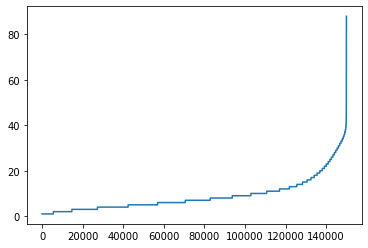

142587


In [10]:
### 문장 길이 확인

import matplotlib.pyplot as plt

sentence_len = [len(sentence) for sentence in sentences]
sentence_len.sort()
plt.plot(sentence_len)
plt.show()

print(sum([int(l <= 25) for l in sentence_len]))

### 한 리뷰인 문장의 단어를 25개로 동일하게

- **기준이 되는 문장의 길이를 25단어**

  - 이 이상은 생략
  - 이하는 패딩으로 길이를 25로 맞추어 임베딩 레이어에 넣을 준비

- **각 단어의 최대 길이도 5로 조정**

  - 5로 조정, 이후는 제거

    - '스파이더맨에서'는 '스파이더맨'까지

```py
sentences_new = []
for sentence in sentences:
  sentences_new.append(word[:5] for word in sentence[:25])

sentences = sentences_new
for i in range(5):
  print(sentences[i])
```

In [14]:
### 한 리뷰인 문장의 단어를 25개로 동일하게

sentences_new = []
for sentence in sentences:
  sentences_new.append([word[:5] for word in sentence][:25])

sentences = sentences_new
for i in range(5):
  print(sentences[i])

['아', '더빙', '진짜', '짜증나네요', '목소리']
['흠', '포스터보고', '초딩영화줄', '오버연기조', '가볍지', '않구나']
['너무재밓었']
['교도소', '이야기구먼', '솔직히', '재미는', '없다', '평점', '조정']
['사이몬페그', '익살스런', '연기가', '돋보였던', '영화', '!', '스파이더맨', '늙어보이기', '했던', '커스틴', '던스트가', '너무나도', '이뻐보였다']


### 짧은 문장도 같은 길이의 문장(25단어)으로 바꾸기

- **Tokenizer 사용**

  - 모든 단어를 사용하지 않고 출현빈도가 가장 높은 일부 단어만 사용
  - 데이터에 출현하는 모든 단어의 개수를 세고 빈도 수를 정렬

    - num_words

      - 지정된 만큼만 숫자로 반환하고 나머지는 0으로 반환

  - tokenizer.fit_on_texts(sentences)
    
    - Tokenizer에 데이터를 실제로 입력

  - tokenizer.texts_to_sequences(sentence)

    - 문장을 입력 받아 숫자로 반환
    - 결과를 학습 데이터로 사용

  - pad_sequences(train_X, padding='post')

    - 단어 수 25개 미만인 데이터의 끝에 0을 추가
    - 인수 pre

      - 문장의 앞에 패딩을 넣고

    - post

      - 문장의 뒤에 패딩을 추가

```py
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(sentences)
train_X = tokenizer.texts_to_sequences(sentences)
train_X = pad_sequences(train_X, padding='post')

print(train_X[:5])
```

In [15]:
### 짧은 문장도 같은 길이의 문장(25단어)으로 바꾸기

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(sentences)
train_X = tokenizer.texts_to_sequences(sentences)
train_X = pad_sequences(train_X, padding='post')

print(train_X[:5])

[[   25   884     8  5795  1111     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [  588  5796  6697     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [   71   346    31    35 10468     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [  106  5338     4     2  2169   869   573     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]]


### tokenizer.index_word()

- **메소드 index_word(index)**

  - 해당 첨자의 단어를 반환
  - 각 번호마다 매칭되는 한글을 보려면 위와 같은 코드로 구현

```py
for idx, word in enumerate(range(1, 26), 1):
  print(idx, tokenizer.index_word[word])
```

```py
# tokenizer의 동작 확인

print(tokenizer.index_word[19999])
print(tokenizer.index_word[20000])
temp = tokenizer.texts_to_sequences(['#$#$#', '경우는', '잊혀질', '연기가'])

print(temp)
temp = pad_sequences(temp, padding = 'post')
print(temp)
```

In [19]:
### tokenizer.index_word()


for idx, word in enumerate(range(1, 26), 1):
  print(idx, tokenizer.index_word[word])

print("============================================")

# tokenizer의 동작 확인

print(tokenizer.index_word[19999])
print(tokenizer.index_word[20000])
temp = tokenizer.texts_to_sequences(['#$#$#', '경우는', '잊혀질', '연기가'])

print(temp)
temp = pad_sequences(temp, padding = 'post')
print(temp)

1 
2 !
3 ,
4 영화
5 \?
6 너무
7 정말
8 진짜
9 이
10 그냥
11 왜
12 이런
13 더
14 수
15 영화를
16 다
17 잘
18 보고
19 좀
20 영화는
21 영화가
22 그
23 봤는데
24 본
25 아
경우는
잊혀질
[[], [19999], [], [106]]
[[    0]
 [19999]
 [    0]
 [  106]]


### tf.keras.preprocessing.sequence.pad_sequences

```py
sequence = [[1], [2, 3], [4, 5, 6]]
tf.keras.preprocessing.sequence.pad_sequences(sequence)
```

```py
tf.keras.preprocessing.sequence.pad_sequences(sequence, value = -1)
```

```py
tf.keras.preprocessing.sequence.pad_sequences(sequence, padding='post')
```

In [58]:
### tf.keras.preprocessing.sequence.pad_sequences

sequence = [[1], [2, 3], [4, 5, 6]]
print(tf.keras.preprocessing.sequence.pad_sequences(sequence))

print(" ")
print("=======================================================")
print(" ")

print(tf.keras.preprocessing.sequence.pad_sequences(sequence, value = -1))

print(" ")
print("=======================================================")
print(" ")

tf.keras.preprocessing.sequence.pad_sequences(sequence, padding='post')



[[0 0 1]
 [0 2 3]
 [4 5 6]]
 
 
[[-1 -1  1]
 [-1  2  3]
 [ 4  5  6]]
 
 


array([[1, 0, 0],
       [2, 3, 0],
       [4, 5, 6]], dtype=int32)

### 영화 리뷰의 긍정/부정을 분류하는 네트워크 정의

- **긍정/부정을 분류하는 네트워크를 정의**

  - 임베딩 레이어와 LSTM 레이어를 연결한 뒤
  - 마지막에 Dense 레이어의 소프트맥스 활성화 함수를 사용

```py
model = tf.keras.Sequential([
  tf.keras.layers.Embedding(20000, 300, input_length=25),
  tf.keras.layers.LSTM(units=50),
  tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
```

In [59]:
### 영화 리뷰의 긍정/부정을 분류하는 네트워크 정의

model = tf.keras.Sequential([
  tf.keras.layers.Embedding(20000, 300, input_length=25),
  tf.keras.layers.LSTM(units=50),
  tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 25, 300)           6000000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                70200     
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 102       
Total params: 6,070,302
Trainable params: 6,070,302
Non-trainable params: 0
_________________________________________________________________


### 임베딩의 주요 인수 

- **정수 인코딩이 된 단어들을 입력을 받아서 임베딩을 수행**

  - tf.keras.layers.Embedding(20000, 300, input_length=25)

    - 20000 : 단어 집합의 크기. 즉, 총 단어의 개수

      - 2만 개의 단어만 활용

    - 300 :  임베딩 벡터의 출력 차원. 결과로써 나오는 임베딩 벡터의 크기

      - 각 단어를 길이 300의 임베딩 벡터로 변환

    - input_length=25

      - 문장의 리뷰는 최대 25개의 단어


[그림 참고 p.22 pdf 바로가기](https://github.com/lee7py/Tensorflow-DNN/blob/master/%5B08-1%20%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%20%EA%B8%B0%EB%B0%98%20%EB%94%A5%EB%9F%AC%EB%8B%9D%5D%20(0814%EA%B8%88%201~2%EA%B5%90%EC%8B%9C%20p30)%20%EC%88%9C%ED%99%98%EC%8B%A0%EA%B2%BD%EB%A7%9D%20%EC%9E%84%EB%B2%A0%EB%94%A9%20%EB%A0%88%EC%9D%B4%EC%96%B4.pdf)
  

### 단어 임베딩 과정 정리

```py
# 문장 토큰화와 단어 토큰화
text = [['Hope', 'to', 'see', 'you', 'soon'], ['Nice', 'to', 'see', 'you', 'again']]

# 각 단어에 대한 정수 인코딩
text = [[0, 1, 2, 3, 4], [5, 1, 2, 3, 6]]

# 위 데이터가 아래의 임베딩 층의 입력.
Embedding(7, 2, input_length=5)
# 7은 단어의 갯수. 즉, 단어 집합의 크기
# 2는 임베딩한 후 벡터의 크기
# 5는 각 입력 시퀀스의 길이. 
```

### 학습

```py
# 감성 분석 모델 학습

history = model.fit(train_X, train_Y, epochs=5, batch_size=128, validation_split=0.2)
```

In [60]:
### 학습


# 감성 분석 모델 학습

history = model.fit(train_X, train_Y, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5


ValueError: ignored

### 학습 결과 시각화

- **batch_size=128**
- **5 에포크 학습**

  - 학습 과정에서 loss는 꾸준히 감소

- **과적합 발생**

  - val_loss는 점점 증가하는 것을 확인

```py
# 7.29 감성 분석 모델 학습 결과 확인
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()
```

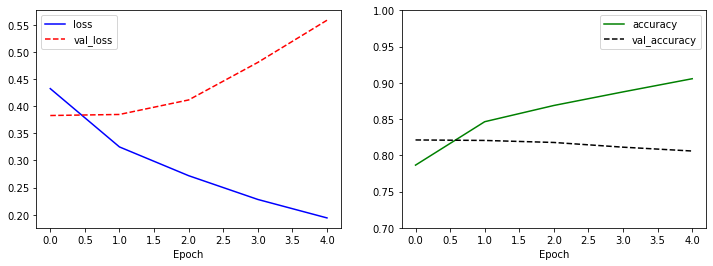

In [34]:
### 학습 결과 시각화

# 7.29 감성 분석 모델 학습 결과 확인
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

### 학습 결과 테스트

- **test_text에도 train_text와 같은 변환 과정을 거쳐서 test_X를 생성**

  - 이미 학습데이터로 학습시킨 Tokenizer를 어떤 변경 없이 그대로 사용
    
    - 테스트 데이터는 우리 손에 없다는 가정하에 작업을 진행

- **약 80% 정도의 결과**

```py
# 테스트 데이터 평가
test_text_X = [row.split('\t')[1] for row in test_text.split('\n')[1:] if row.count('\t') > 0]
test_text_X = [clean_str(sentence) for sentence in test_text_X]

sentences = [sentence.split(' ') for sentence in test_text_X]

sentences_new = []
for sentence in sentences:
  sentences_new.append([word[:5] for word in sentence][:25])
sentences = sentences_new


test_X = tokenizer.texts_to_sequences(sentences)
test_X = pad_sequences(test_X, padding='post')

model.evaluate(test_X, test_Y, verbose=0)
```

In [35]:
### 학습 결과 테스트

# 테스트 데이터 평가
test_text_X = [row.split('\t')[1] for row in test_text.split('\n')[1:] if row.count('\t') > 0]
test_text_X = [clean_str(sentence) for sentence in test_text_X]

sentences = [sentence.split(' ') for sentence in test_text_X]

sentences_new = []
for sentence in sentences:
  sentences_new.append([word[:5] for word in sentence][:25])
sentences = sentences_new


test_X = tokenizer.texts_to_sequences(sentences)
test_X = pad_sequences(test_X, padding='post')

model.evaluate(test_X, test_Y, verbose=0)


[0.5666705369949341, 0.8001199960708618]

### 임의의 문장에 대한 감성 분석

- **순환 신경망이 입력의 변화에 따라 값이 변한다는 것을 확인**

  - 하나의 문장을 잘라서 앞에서부터 차례로 입력
  - '너무'라는 단어 '졸리고'가 나왔을 때 99%의 확률로 부정적 감성을 예측

```py
test_sentence = '재미있을 줄 알았는데 완전 실망했다. 너무 졸리고 돈이 아까웠다.'
test_sentence = test_sentence.split(' ')
test_sentences = []
now_sentence = []

for word in test_sentences:
  now_sentence.append(word)
  test_sentences.append(now_sentence[:])

test_X_1 = tokenizer.texts_to_sequences(test_sentences)
test_X_1 = pad_sequences(test_X_1, padding='post', maxlen=25)
prediction = model.prediction(test_X_1)

for idx, sentence in enumerate(test_sentences):
  print(sentence)
  print(prediction[idx])
```

In [55]:
### 임의의 문장에 대한 감성 분석

test_sentence = '재미있을 줄 알았는데 완전 실망했다. 너무 졸리고 돈이 아까웠다.'
test_sentence = test_sentence.split(' ')
test_sentences = []
now_sentence = []

for word in test_sentence:
  now_sentence.append(word)
  test_sentences.append(now_sentence[:])

test_X_1 = tokenizer.texts_to_sequences(test_sentences)
test_X_1 = pad_sequences(test_X_1, padding='post', maxlen=25)
prediction = model.predict(test_X_1)

for idx, sentence in enumerate(test_sentences):
  print(sentence)
  print(prediction[idx])

ValueError: ignored

## Autoencoder ; 9장 오토인코더



### 오토인코더 개요

- **오토인코더(AutoEncoder)**

  - 출력값을 입력값의 근사로 하는 함수를 학습하는 비지도 학습

    - 오토인코더는 자기 자신을 재생성하는 네트워크

      - 데이터의 숨겨진 구조를 발견하는 것이 학습목표

    - 새로운 머신러닝의 범주로 분류하기도

      - 자신 지도 학습(self supervised learning)

  - 출력이 입력과 동일하다는 점이 상이

    - 입력층으로 들어온 데이터를 인코더를 통해 은닉층으로 내보냄
    - 은닉층의 데이터를 디코더를 통해 출력층으로 내보냄
    - 만들어진 출력값을 입력값과 비슷해지도록 만드는 가중치를 찾아내는 것

- **일종의 파일 압축과 유사**

  - 오토인코더는 손실 압축

- **적대적 생성 모델 GAN (Generative Adversarial Network)**

  - 랜덤하게 생성된 변수를 잠재변수처럼 활용해서 새로운 이미지를 생성

  

### 오토인코더 구성

- **오토인코더는 크게 3가지 부분으로 구성**

  - 잠재 변수(은닉층)를 기준으로 하나의 대칭구조

    - 잠재 변수(Latent Vector)를 중심

      - 일차원 벡터

    - 입력에 가까운 부분을 인코더(Encoder)

      - 입력에서 잠재변수를 생성, CNN에서 특징 추출기와 비슷

    - 출력에 가까운 부분을 디코더(decoder)

      - 잠재 변수를 출력

      

## 9장 오토인코더 ; 1 MNIST 손글씨 오토인코더 적용

### MNIST 손글씨 오토인코더 적용

[그림 참고 p.6 pdf 바로가기](https://github.com/lee7py/Tensorflow-DNN/blob/master/%5B08-2%20%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%20%EA%B8%B0%EB%B0%98%20%EB%94%A5%EB%9F%AC%EB%8B%9D%5D%20(0814%EA%B8%88%203~4%EA%B5%90%EC%8B%9C%20p40)%209%EC%9E%A5%20%EC%98%A4%ED%86%A0%EC%9D%B8%EC%BD%94%EB%8D%94.pdf)

### MNIST 손글씨 문제

- **Dense 층으로 MNIST 손글씨 오토인코더 구현**

```py
# 텐서플로 2 버전 선택

try:
    %tensorflow_version 2.x
  
except Exception:
  pass

import tensorflow as tf
import numpy as np
import pandas as pd
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import cv2

(train_X, train_Y), (test_X, test_Y) = tf.keras.datasets.mnist.load_data()
print(train_X.shape, train_Y.shape)
```

In [37]:
### MNIST 손글씨 문제

# 텐서플로 2 버전 선택

try:
    %tensorflow_version 2.x
  
except Exception:
  pass

import tensorflow as tf
import numpy as np
import pandas as pd
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import cv2

(train_X, train_Y), (test_X, test_Y) = tf.keras.datasets.mnist.load_data()
print(train_X.shape, train_Y.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)


### 첫 이미지 확인

```py
train_X = train_X / 255.0
test_X = test_X / 255.0

plt.imshow(train_X[0].reshape(28, 28), cmap='gray')
plt.colorbar()
plt.show()

print(train_Y[0])
```

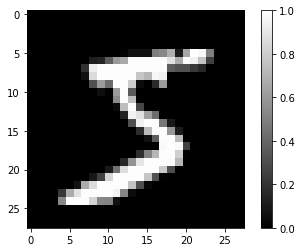

5


In [38]:
### 첫 이미지 확인

train_X = train_X / 255.0
test_X = test_X / 255.0

plt.imshow(train_X[0].reshape(28, 28), cmap='gray')
plt.colorbar()
plt.show()

print(train_Y[0])

### Dense 오토인코더 모델 정의

- **Flatten 레이어를 사용하는 대신**

  - train_X와 test_X의 차원을 직접 reshape() 함수로 변환

    - 입력과 출력의 형태가 같아야하기 때문

- **dense와 dense_2의 레이어**

  - 뉴런의 수가 같아서 대칭을 이루며
  - 각각 인코더와 디코더의 역할
  - dense_1는 잠재변수로 뉴런의 수가 적은 것을 확인

```py
train_X = train_X.reshape(-1, 28 * 28)
test_X = test_X.reshape(-1, 28 * 28)
print(train_X.shape, train_Y.shape)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(784, activation='relu', input_shape=(784,)),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(784, activation='sigmoid')
])

model.compile(optimizer=tf.optimizers.Adam(), loss='mse')
model.summary()
```

In [39]:
### Dense 오토인코더 모델 정의

train_X = train_X.reshape(-1, 28 * 28)
test_X = test_X.reshape(-1, 28 * 28)
print(train_X.shape, train_Y.shape)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(784, activation='relu', input_shape=(784,)),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(784, activation='sigmoid')
])

model.compile(optimizer=tf.optimizers.Adam(), loss='mse')
model.summary()

(60000, 784) (60000,)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_3 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_4 (Dense)              (None, 784)               50960     
Total params: 716,640
Trainable params: 716,640
Non-trainable params: 0
_________________________________________________________________


### Dense 오토 인코더 모델 구조

- **입력, 출력층 모두 Dense**

  - 28 x 28 = 784

### Dense 오토 인코더 모델 학습

```py
model.fit(train_X, train_X, epochs=10, batch_size=256)
```

In [40]:
### Dense 오토 인코더 모델 학습

model.fit(train_X, train_X, epochs=10, batch_size=256)

Epoch 1/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0506
Epoch 2/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0173
Epoch 3/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0120
Epoch 4/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0100
Epoch 5/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0088
Epoch 6/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0080
Epoch 7/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0074
Epoch 8/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0070
Epoch 9/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0067
Epoch 10/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0064


### 모델 시각화

```py
import random

plt.figure(figsize=(4, 8))
for c in range(4):
  plt.subplot(4, 2, c*2+1)
  rand_index = random.randint(0, test_X.shape[0])
  plt.imshow(test_X[rand_index].reshape(28, 28), cmap='gray')
  plt.axis('off')

  plt.subplot(4, 2, c*2+2)
  img = model.predict(np.expand_dims(test_X[rand_index], axis=0))
  plt.imshow(img.reshape(28, 28), cmap='gray')
  plt.axis('off')

plt.show()

model.evaluate(test_X, test_X)
```

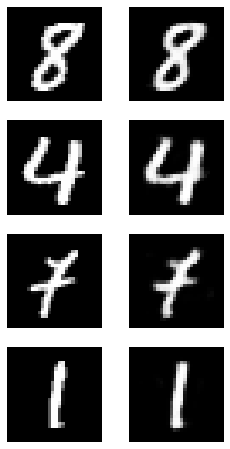

313/313 [==============================] - 0s 1ms/step - loss: 0.0061


0.006094163283705711

In [43]:
### 모델 시각화

import random

plt.figure(figsize=(4, 8))
for c in range(4):
  plt.subplot(4, 2, c*2+1)
  rand_index = random.randint(0, test_X.shape[0])
  plt.imshow(test_X[rand_index].reshape(28, 28), cmap='gray')
  plt.axis('off')

  plt.subplot(4, 2, c*2+2)
  img = model.predict(np.expand_dims(test_X[rand_index], axis=0))
  plt.imshow(img.reshape(28, 28), cmap='gray')
  plt.axis('off')

plt.show()

model.evaluate(test_X, test_X)

### CNN으로 MNIST 손글씨 오토인코더

[그림 참고 p.13 pdf 바로가기](https://github.com/lee7py/Tensorflow-DNN/blob/master/%5B08-2%20%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%20%EA%B8%B0%EB%B0%98%20%EB%94%A5%EB%9F%AC%EB%8B%9D%5D%20(0814%EA%B8%88%203~4%EA%B5%90%EC%8B%9C%20p40)%209%EC%9E%A5%20%EC%98%A4%ED%86%A0%EC%9D%B8%EC%BD%94%EB%8D%94.pdf)

### CNN으로 MNIST 손글씨 오토인코더 구현

```py
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=32, kernel_size=2, strides=(2, 2), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.Conv2D(filters=64, kernel_size=2, strides=(2, 2), activation='relu'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(7*7*64, activation='relu'),
  tf.keras.layers.Reshape(target_shape=(7, 7, 64)),
  tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=2, strides=(2, 2), padding='same', activation='relu'),
  tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=2, strides=(2, 2), padding='same', activation = 'sigmoid')
])

model.compile(optimizer=tf.optimizers.Adam(), loss='mse')
model.summary()
```

In [45]:
### CNN으로 MNIST 손글씨 오토인코더 구현

train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=32, kernel_size=2, strides=(2, 2), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.Conv2D(filters=64, kernel_size=2, strides=(2, 2), activation='relu'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(7*7*64, activation='relu'),
  tf.keras.layers.Reshape(target_shape=(7, 7, 64)),
  tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=2, strides=(2, 2), padding='same', activation='relu'),
  tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=2, strides=(2, 2), padding='same', activation = 'sigmoid')
])

model.compile(optimizer=tf.optimizers.Adam(), loss='mse')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 32)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 64)          8256      
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                200768    
_________________________________________________________________
dense_6 (Dense)              (None, 3136)              203840    
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 32)       

### CNN 으로 MNIST 손글씨 오토인코더 모델

[그림 참고 p.15 pdf 바로가기](https://github.com/lee7py/Tensorflow-DNN/blob/master/%5B08-2%20%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%20%EA%B8%B0%EB%B0%98%20%EB%94%A5%EB%9F%AC%EB%8B%9D%5D%20(0814%EA%B8%88%203~4%EA%B5%90%EC%8B%9C%20p40)%209%EC%9E%A5%20%EC%98%A4%ED%86%A0%EC%9D%B8%EC%BD%94%EB%8D%94.pdf)

### 인코더와 잠재변수

- **Conv2D 레이어를 2개**

  - kernel_size=2, strides=(2, 2) 로 설정해서 풀링 레이어를 쓰는 것과 같은 효과  
  - Conv2D를 통과할 때마다 50%씩 감소
  - 두번째 Conv2D를 통과하면 이미지의 크기는 7x7

```py
tf.keras.layers.Conv2D(filters=32, kernel_size=2, strides=(2, 2), activation='relu', input_shape=(28, 28, 1)),
tf.keras.layers.Conv2D(filters=64, kernel_size=2, strides=(2, 2), activation='relu'),
```

- **잠재변수 생성**

  - Flatten()을 통과

    - 3차원의 데이터를 1차원으로

  - 64개 뉴런의 Dense 층

    - Dense 오토인코더와 동일한 크기로 64개의 뉴런을 가지는 Dense 레이어를 배치

```py
tf.keras.layers.Flatten()
tf.keras.layers.Dense(64, activation='relu'),
```

### 디코더 생성

- **디코더 생성**

  - 디코더는 인코더와 대칭이 되도록 다시 구성
  - 잠재 변수 레이어와 연결된 레이어는 7 x 7 이미지를 만들기 위해 64개의 채널만큼 가지고 있는 Conv2D 레이어
  - 레이어와 뉴런 수를 동일하게 만들기 위해서 Dense 레이어의 뉴런 수를 7*7*64로

  ```py
  tf.keras.layers.Dense(7*7*64, activation='relu')
  ```

  - 1차원 데이터를 3차원으로 바꿔주기 위해 64개의 채널만큼 Reshape레이어 사용

  ```py
  tf.keras.layers.Reshape(target_shape=(7, 7, 64))
  ```

  - 마지막으로 이어지는 2개의 레이어는 Conv2DTranspose

    - Conv2D 레이어가 하는 일의 반대되는 계산으로 이해

  - 필터의 개수가 1인 것은 흑백인 출력 이미지와 동일

```py
tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=2, strides=(2, 2), padding='same', activation='relu'),
tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=2, strides=(2, 2), padding='same', activation='sigmoid')
```

### 학습 

```py
model.fit(train_X, train_X, epochs=10, batch_size=256)
```

In [46]:
### 학습 

model.fit(train_X, train_X, epochs=10, batch_size=256)

Epoch 1/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0769
Epoch 2/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0286
Epoch 3/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0190
Epoch 4/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0166
Epoch 5/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0154
Epoch 6/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0147
Epoch 7/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0143
Epoch 8/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0139
Epoch 9/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0137
Epoch 10/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0135


### 오토 인코더의 이미지 재생성 및 모형 성능 평가

```py
import random

plt.figure(figsize=(4, 8))
for c in range(4):
  plt.subplot(4, 2, c*2+1)
  rand_index = random.randint(0, test_X.shape[0])
  plt.imshow(test_X[rand_index].reshape(28, 28), cmap='gray')
  plt.axis('off')

  plt.subplot(4, 2, c*2+2)
  img = model.predict(np.expand_dims(test_X[rand_index], axis=0))
  plt.imshow(img.reshape(28, 28), cmap='gray')
  plt.axis('off')

plt.show()

model.evaluate(test_X, test_X)
```

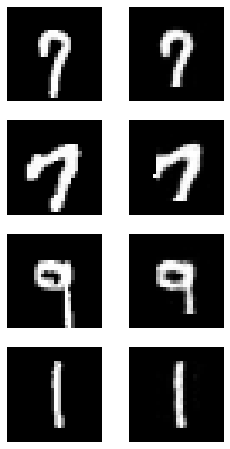

313/313 [==============================] - 1s 2ms/step - loss: 0.0130


0.012952144257724285

In [47]:
### 오토 인코더의 이미지 재생성 및 모형 성능 평가

import random

plt.figure(figsize=(4, 8))
for c in range(4):
  plt.subplot(4, 2, c*2+1)
  rand_index = random.randint(0, test_X.shape[0])
  plt.imshow(test_X[rand_index].reshape(28, 28), cmap='gray')
  plt.axis('off')

  plt.subplot(4, 2, c*2+2)
  img = model.predict(np.expand_dims(test_X[rand_index], axis=0))
  plt.imshow(img.reshape(28, 28), cmap='gray')
  plt.axis('off')

plt.show()

model.evaluate(test_X, test_X)

### 활성화함수( activation ) ELU 수정

- **대부분 relu를 사용**

  - relu는 양수와 0을 반환

    - 뉴런의 계산값 중 음수가 되는 결과가 많을 경우 뉴런의 출력은 무조건 0

    - 출력은 다음 레이어의 가중치에 곱해지기 때문에 출력이 0 이면 가중치의 효과를 모두 0

  - 이러한 문제점을 해결하고자 elu 사용

- **ELU ( Exponential Linear Units)**

  - elu는 0으로 수렴하지 않고 -1로 수렴
  - 2015년, Clevert et al에 의해 제안

  f(x) = x (x > 0),
  f(x) = a(exp(x) - 1) (x <= 0) 

> a는 알파를 의미.

```py
import math

x = np.arange(-5, 5, 0.01)
relu = [0 if z < 0 else z for z in x]
elu = [1.0 * (np.exp(z) - 1) if z < 0 else z for z in x]

# plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(x, relu, 'r--', label='relu')
plt.plot(x, elu, 'g-', label='elu')
plt.legend()
plt.show()
```

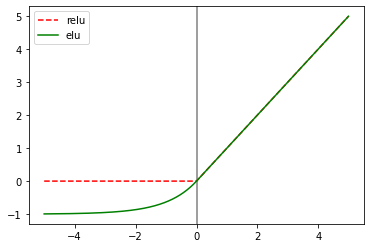

In [49]:
### 활성화함수( activation ) ELU 수정

import math

x = np.arange(-5, 5, 0.01)
relu = [0 if z < 0 else z for z in x]
elu = [1.0 * (np.exp(z) - 1) if z < 0 else z for z in x]

# plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(x, relu, 'r--', label='relu')
plt.plot(x, elu, 'g-', label='elu')
plt.legend()
plt.show()

### 활성화함수 ELU 수정 모델

- **손실 값**

  - 1/3 감소

- **결과 그림**

  - relu와 다르게 이전의 각진 모습은 거의 찾아볼 수 없음
  - 노이즈를 제거하는 효과도 볼 수 있음

```py
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=32, kernel_size=2, strides=(2,2), activation='elu', input_shape=(28, 28, 1)),
  tf.keras.layers.Conv2D(filters=64, kernel_size=2, strides=(2,2), activation='elu'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='elu'),
  tf.keras.layers.Dense(7*7*64, activation='elu'),
  tf.keras.layers.Reshape(target_shape=(7,7,64)),
  tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=2, strides=(2,2), padding='same', activation='elu'),
  tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=2, strides=(2,2), padding='same', activation='sigmoid')
])

model.compile(optimizer=tf.optimizers.Adam(), loss='mse')
model.summary()

model.fit(train_X, train_X, epochs=10, batch_size=256)
```

In [50]:
### 활성화함수 ELU 수정 모델

train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=32, kernel_size=2, strides=(2,2), activation='elu', input_shape=(28, 28, 1)),
  tf.keras.layers.Conv2D(filters=64, kernel_size=2, strides=(2,2), activation='elu'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='elu'),
  tf.keras.layers.Dense(7*7*64, activation='elu'),
  tf.keras.layers.Reshape(target_shape=(7,7,64)),
  tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=2, strides=(2,2), padding='same', activation='elu'),
  tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=2, strides=(2,2), padding='same', activation='sigmoid')
])

model.compile(optimizer=tf.optimizers.Adam(), loss='mse')
model.summary()

model.fit(train_X, train_X, epochs=10, batch_size=256)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 14, 14, 32)        160       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          8256      
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                200768    
_________________________________________________________________
dense_8 (Dense)              (None, 3136)              203840    
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 14, 14, 32)       

### 활성화함수 ELU 수정 모델 전 소스

```py
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=32, kernel_size=2, strides=(2,2), activation='elu', input_shape=(28, 28, 1)),
  tf.keras.layers.Conv2D(filters=64, kernel_size=2, strides=(2,2), activation='elu'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='elu'),
  tf.keras.layers.Dense(7*7*64, activation='elu'),
  tf.keras.layers.Reshape(target_shape=(7,7,64)),
  tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=2, strides=(2,2), padding='same', activation='elu'),
  tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=2, strides=(2,2), padding='same', activation='sigmoid')
])

model.compile(optimizer=tf.optimizers.Adam(), loss='mse')
model.summary()

model.fit(train_X, train_X, epochs=10, batch_size=256)

import random

plt.figure(figsize=(4,8))
for c in range(4):
  plt.subplot(4, 2, c*2+1)
  rand_index = random.randint(0, test_X.shape[0])
  plt.imshow(test_X[rand_index].reshape(28, 28), cmap='gray')
  plt.axis('off')

  plt.subplot(4, 2, c*2+2)
  img = model.predict(np.expand_dims(test_X[rand_index], axis=0))
  plt.imshow(img.reshape(28, 28), cmap='gray')
  plt.axis('off')

plt.show()

model.evaluate(test_X, test_X)
```

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 14, 14, 32)        160       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 64)          8256      
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                200768    
_________________________________________________________________
dense_10 (Dense)             (None, 3136)              203840    
_________________________________________________________________
reshape_2 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_transpose_4 (Conv2DTr (None, 14, 14, 32)       

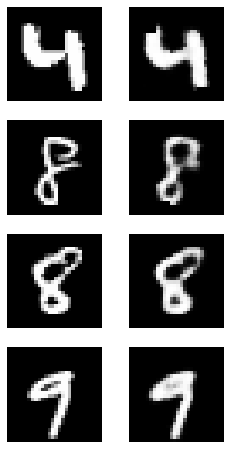

313/313 [==============================] - 1s 2ms/step - loss: 0.0071


0.007123847957700491

In [51]:
### 활성화함수 ELU 수정 모델 전 소스

train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=32, kernel_size=2, strides=(2,2), activation='elu', input_shape=(28, 28, 1)),
  tf.keras.layers.Conv2D(filters=64, kernel_size=2, strides=(2,2), activation='elu'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='elu'),
  tf.keras.layers.Dense(7*7*64, activation='elu'),
  tf.keras.layers.Reshape(target_shape=(7,7,64)),
  tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=2, strides=(2,2), padding='same', activation='elu'),
  tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=2, strides=(2,2), padding='same', activation='sigmoid')
])

model.compile(optimizer=tf.optimizers.Adam(), loss='mse')
model.summary()

model.fit(train_X, train_X, epochs=10, batch_size=256)

import random

plt.figure(figsize=(4,8))
for c in range(4):
  plt.subplot(4, 2, c*2+1)
  rand_index = random.randint(0, test_X.shape[0])
  plt.imshow(test_X[rand_index].reshape(28, 28), cmap='gray')
  plt.axis('off')

  plt.subplot(4, 2, c*2+2)
  img = model.predict(np.expand_dims(test_X[rand_index], axis=0))
  plt.imshow(img.reshape(28, 28), cmap='gray')
  plt.axis('off')

plt.show()

model.evaluate(test_X, test_X)

## 9장 오토인코더 - 3 클러스터링



### 클러스터링 개요

- **대표적인 비지도학습 방법의 한 종류**

  - 비슷한 군집으로 나누는 것
  - 입력에 대한 정답이 없음

- **사례**

  - 사람의 얼굴 이미지를 몇 개의 집단으로 분류하는 것이 적절할까요?
  - 단편 소설의 장르를 몇 개로 구분해야 할까요?


[그림 참고 p.24 pdf 바로가기](https://github.com/lee7py/Tensorflow-DNN/blob/master/%5B08-2%20%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%20%EA%B8%B0%EB%B0%98%20%EB%94%A5%EB%9F%AC%EB%8B%9D%5D%20(0814%EA%B8%88%203~4%EA%B5%90%EC%8B%9C%20p40)%209%EC%9E%A5%20%EC%98%A4%ED%86%A0%EC%9D%B8%EC%BD%94%EB%8D%94.pdf)



### K-평균 클러스터링

- **K-means Clustering**

  - 데이터를 입력받아 이를 소수의 그룹으로 묶는 알고리즘

- **방법**

  - 1. 주어진 입력 중 K개의 클러스터 중심을 임의로 정한 다음
  - 2. 각 데이터와 K개의 중심과의 거리를 비교해서 가장 가까운 클러스터로 배당하고
  - 3. K개의 중심의 위치를 해당 클러스터로 옮긴 후, 이를 반복하는 알고리즘



### KC 학습과정(1)

[그림 참고 p.26 pdf 바로가기](https://github.com/lee7py/Tensorflow-DNN/blob/master/%5B08-2%20%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%20%EA%B8%B0%EB%B0%98%20%EB%94%A5%EB%9F%AC%EB%8B%9D%5D%20(0814%EA%B8%88%203~4%EA%B5%90%EC%8B%9C%20p40)%209%EC%9E%A5%20%EC%98%A4%ED%86%A0%EC%9D%B8%EC%BD%94%EB%8D%94.pdf)

> PDF를 참고해서 공부하는 것이 편하다

### KC 학습과정(2)

[그림 참고 p.26 pdf 바로가기](https://github.com/lee7py/Tensorflow-DNN/blob/master/%5B08-2%20%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%20%EA%B8%B0%EB%B0%98%20%EB%94%A5%EB%9F%AC%EB%8B%9D%5D%20(0814%EA%B8%88%203~4%EA%B5%90%EC%8B%9C%20p40)%209%EC%9E%A5%20%EC%98%A4%ED%86%A0%EC%9D%B8%EC%BD%94%EB%8D%94.pdf)

> PDF를 참고해서 공부하는 것이 편하다

### K-means 군집화 메모 코딩(1)

```py
# 출력 코드
import random
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, Y = make_blobs(random_state=6)
pred_Y = np.zeros_like(Y)

fig = plt.figure(figsize=(6, 12))

centers = []

for c in range(3):
  center_X = random.random() * (max(X[:, 0]) - min(X[:, 0])) + min(X[:, 0])
  center_Y = random.random() * (max(X[:, 1]) - min(X[:, 1])) + min(X[:, 1])

centers.append(centers)
prev_centers = []
```

### K-means 군집화 메모 코딩 (2)

```py
for t in range(3):
  for i in range(len(X)):
    min_dist = 9999
    center = -1
    for c in range(3):
      dist = ((X[i, 0] - centers[c, 0]) ** 2 + (X[i, 1] - centers[c, 1]) ** 2) ** 0.5

      if dist < min_dist:
        min_dist = dist
        center = c

    pred_Y[i] = center

  ax = fig.add_subplot(3, 1, t+1)
  ax.set_xticks([])
  ax.set_yticks([])
  ax.scatter(X[:, 0], X[:, 1], marker='.', c=pred_Y, cmap='rainbow')
  ax.scatter(centers[:, 0], centers[:, 1], marker="D", c=range(3), cmap='rainbow', edgecolors=(0, 0, 0, 1))

  if len(prev_centers) != 0:
    for c in range(3):
      ax.arrow(prev_centers[c,0], prev_centers[c,1], (centers[c,0] - prev_centers[c,0])*0.95, (centers[c,1] - prev_centers[c,1])*0.95, head_width=0.25, head_length=0.2, fc='k', ec='k')


  # update center
  prev_centers = np.copy(centers)
  for c in range(3):
    count = len(pred_Y[pred_Y == c])
    centers[c,0] = sum(X[pred_Y == c, 0]) / (count+1e-6)
    centers[c,1] = sum(X[pred_Y == c, 1]) / (count+1e-6)
plt.show()
```

In [54]:
### K-means 군집화 메모 코딩(1)

# 출력 코드
import random
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, Y = make_blobs(random_state=6)
pred_Y = np.zeros_like(Y)

fig = plt.figure(figsize=(6, 12))

centers = []

for c in range(3):
  center_X = random.random() * (max(X[:, 0]) - min(X[:, 0])) + min(X[:, 0])
  center_Y = random.random() * (max(X[:, 1]) - min(X[:, 1])) + min(X[:, 1])

centers.append(centers)
prev_centers = []

### K-means 군집화 메모 코딩 (2)

for t in range(3):
  for i in range(len(X)):
    min_dist = 9999
    center = -1
    for c in range(3):
      dist = ((X[i,0] - centers[c,0]) ** 2 + (X[i,1] - centers[c,1]) ** 2) ** 0.5

      if dist < min_dist:
        min_dist = dist
        center = c

    pred_Y[i] = center

  ax = fig.add_subplot(3, 1, t+1)
  ax.set_xticks([])
  ax.set_yticks([])
  ax.scatter(X[:, 0], X[:, 1], marker='.', c=pred_Y, cmap='rainbow')
  ax.scatter(centers[:, 0], centers[:, 1], marker="D", c=range(3), cmap='rainbow', edgecolors=(0, 0, 0, 1))

  if len(prev_centers) != 0:
    for c in range(3):
      ax.arrow(prev_centers[c,0], prev_centers[c,1], (centers[c,0] - prev_centers[c,0])*0.95, (centers[c,1] - prev_centers[c,1])*0.95, head_width=0.25, head_length=0.2, fc='k', ec='k')


  # update center
  prev_centers = np.copy(centers)
  for c in range(3):
    count = len(pred_Y[pred_Y == c])
    centers[c,0] = sum(X[pred_Y == c, 0]) / (count+1e-6)
    centers[c,1] = sum(X[pred_Y == c, 1]) / (count+1e-6)
plt.show()

ValueError: ignored

<Figure size 432x864 with 0 Axes>

### K-means 군집화 과정

- **다이아몬드 3개**

  - 군집의 중심
  - 계산과정에서 중심이 이동

  

### 잠재 변수의 클러스터링

- **잠재 변수**

  - 데이터의 가장 압축된 표현

    - 손실 압축이지만 중요하지 않거나 세부 정보를 잃어버릴 확률이 높음

  - 효과적으로 복원할 수 있도록 중요한 정보만 포함

- **잠재 변수를 이용해 클러스터링**

  - 바로 이전 코드(p341 예제 9-9)의 잠재변수를 사용

    - 다음 모델의 4번째 층(첨자로 3)의 Dense 층의 출력을 사용

```py
train_X = train_X.reshaep(-1, 28, 28, 1)
test_X = test_X.reshaep(-1, 28, 28, 1)

model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=32, kernel_size=2, strides=(2, 2), activation='elu', input_shape=(28, 28, 1)),
  tf.keras.layers.Conv2D(filters=64, kernel_size=2, strides=(2, 2), activation='elu'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='elu'),
  tf.keras.layers.Dense(7 * 7 * 64, activation='elu'),
  tf.keras.layers.Reshape(target_shape=(7, 7, 64)),
  tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=2, strides=(2, 2), padding='same', activation='elu'),
  tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=2, strides=(2, 2), padding='same', activation='sigmoid'),
])
```

In [57]:
### 잠재 변수의 클러스터링

train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=32, kernel_size=2, strides=(2, 2), activation='elu', input_shape=(28, 28, 1)),
  tf.keras.layers.Conv2D(filters=64, kernel_size=2, strides=(2, 2), activation='elu'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='elu'),
  tf.keras.layers.Dense(7 * 7 * 64, activation='elu'),
  tf.keras.layers.Reshape(target_shape=(7, 7, 64)),
  tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=2, strides=(2, 2), padding='same', activation='elu'),
  tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=2, strides=(2, 2), padding='same', activation='sigmoid'),
])

에러난 부분은 위에서 처음부터 차근차근 해보면 될듯